# Simple RC circuit

For a simple RC circuit, use KVL etc to get an ODE, and use sympy to solve it.

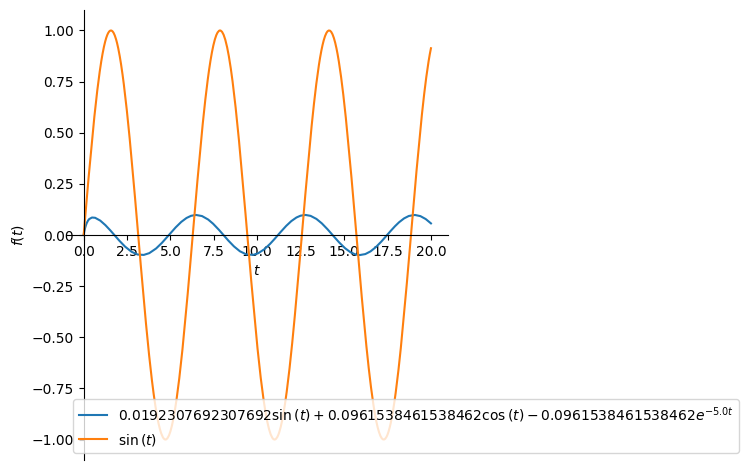

In [67]:
from sympy import *
t = symbols("t", positive=True)
i = symbols("i", cls=Function)
R,C, C1 = symbols("R C C_1")
eqn = i(t).diff() * R + (1/C) * i(t) - cos(t)

de = dsolve(eqn.subs({C:0.1,R:2}), ics={i(0):0})
p1 = plot(de.rhs, (t, 0, 20), show=False, legend=True)
p2 = plot(sin(t), (t, 0, 20), show=False)
p1.append(p2[0])
p1.show()

In [2]:
from lcapy import Circuit
a = Circuit("""
V 1 0 {v(t)}; down
R1 1 2; right
L 2 3; right=1.5, i={i_L}
R2 3 0_3; down=1.5, i={i_{R2}}, v={v_{R2}}
W 0 0_3; right
W 3 3_a; right
C 3_a 0_4; down, i={i_C}, v={v_C}
W 0_3 0_4; right""")
ss = a.ss


/usr/local/lib/python3.10/dist-packages/lcapy/current.py:83: UserWarning: The default hybrid sign convention for currents is deprecated and will default to the passive sign convenention in the next version of Lcapy.  This only affects the sign of the current through sources.  For example, given the netlist

I1 1 0
R1 1 0

the hybrid sign convention gives `I1.i` as `I1` and the passive sign
convention gives `I1.i` as -I1.

To select the passive sign convention use:
`from lcapy import state; state.current_sign_convention = 'passive'`

To select the hybrid sign convention use:
`from lcapy import state; state.current_sign_convention = 'hybrid'`


  warn(
